# Import libraries

In [68]:
!pip install contractions

In [69]:
import pandas as pd
import contractions
import re
import warnings
warnings.filterwarnings("ignore")

# Raw Recipes dataset

In [70]:
recipes = pd.read_csv('../dataset/RAW_recipes.csv')

In [71]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [72]:
recipes.shape

(231637, 12)

In [73]:
recipes.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')

In [74]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [75]:
# Missing values in terms of percentage
recipes.isnull().sum() / len(recipes) * 100

name              0.000432
id                0.000000
minutes           0.000000
contributor_id    0.000000
submitted         0.000000
tags              0.000000
nutrition         0.000000
n_steps           0.000000
steps             0.000000
description       2.149484
ingredients       0.000000
n_ingredients     0.000000
dtype: float64

In [76]:
# drop the columns with missing values as they are a fraction of the dataset
recipes.dropna(axis=1, inplace=True)

<Axes: >

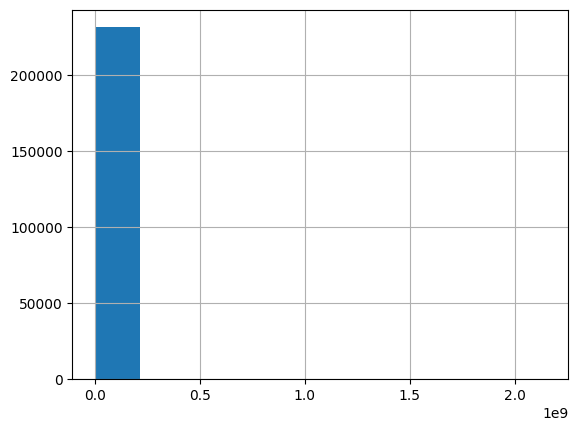

In [77]:
# plot the distribution of minutes to prepare
recipes.minutes.hist()

In [78]:
# There seems to be some outliers in the minutes column
min_time = recipes.minutes.min()
max_time = recipes.minutes.max()
print("Min time: ", min_time)
print("Max time: ", max_time)

Min time:  0
Max time:  2147483647


In [79]:
# recipes that take more than 4 hours to prepare
recipes[recipes.minutes > 60 * 4]

,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients
11,42198,1460,41531,2002-10-03,"['weeknight', 'time-to-make', 'course', 'main-...","[734.1, 66.0, 199.0, 10.0, 10.0, 117.0, 28.0]",8,['crush vanilla wafers into fine crumbs and li...,"['vanilla wafers', 'butter', 'powdered sugar',...",7
12,67547,2970,85627,2003-07-26,"['weeknight', 'time-to-make', 'course', 'main-...","[462.4, 28.0, 214.0, 69.0, 14.0, 29.0, 23.0]",9,['in a very large sauce pan cover the beans an...,"['great northern bean', 'chicken bouillon cube...",13
13,107517,525,137696,2005-01-03,"['time-to-make', 'main-ingredient', 'preparati...","[315.8, 0.0, 202.0, 9.0, 6.0, 0.0, 21.0]",7,"['put prepared greens in large pot', 'add wate...","['collard greens', 'brown sugar', 'molasses', ...",7
15,63986,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...","['lean pork chops', 'flour', 'salt', 'dry must...",7
27,47366,495,31871,2002-11-21,"['weeknight', 'time-to-make', 'course', 'main-...","[346.9, 24.0, 18.0, 42.0, 42.0, 30.0, 10.0]",5,"['in a slow cooker , combine the first nine in...","['beef stew meat', 'water', 'tomatoes', 'beef ...",14
...,...,...,...,...,...,...,...,...,...,...
231232,158292,255,47892,2006-03-02,"['time-to-make', 'course', 'main-ingredient', ...","[54.4, 5.0, 12.0, 0.0, 3.0, 2.0, 1.0]",9,['toss the thinly sliced zucchini with the lem...,"['zucchini', 'lemon, juice of', 'garlic cloves...",7
231355,462992,2900,1403860,2011-08-24,"['time-to-make', 'course', 'main-ingredient', ...","[64.5, 0.0, 44.0, 53.0, 3.0, 0.0, 4.0]",27,['day one: in a large bowl or stainless pan co...,"['zucchini', 'sweet white onions', 'green bell...",17
231549,181958,540,89831,2006-08-15,"['time-to-make', 'course', 'main-ingredient', ...","[616.3, 73.0, 11.0, 70.0, 71.0, 113.0, 3.0]",15,"['grease a 13 x 9-inch baking dish', 'in a ski...","['italian sausages', 'green onions', 'fresh ga...",12
231573,316950,2895,62264,2008-07-31,"['time-to-make', 'course', 'main-ingredient', ...","[343.6, 2.0, 284.0, 194.0, 5.0, 0.0, 25.0]",13,"['wash and trim the zucchini , then slice them...","['zucchini', 'yellow onion', 'kosher salt', 'c...",8


In [80]:
# drop the rows with minutes > 4 hours
recipes = recipes[recipes.minutes < 60 * 4]

<Axes: >

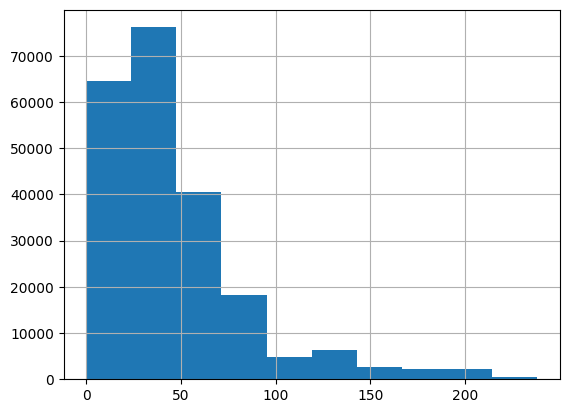

In [81]:
# plot the distribution of minutes to prepare, add a title and labels to the axes
recipes.minutes.hist()

In [82]:
# top 10 contributors
recipes.contributor_id.value_counts().head(10)

89831     2795
37449     2435
37779     2398
1533      1545
58104     1482
169430    1319
80353     1089
4470      1061
283251     962
21752      870
Name: contributor_id, dtype: int64

<Axes: >

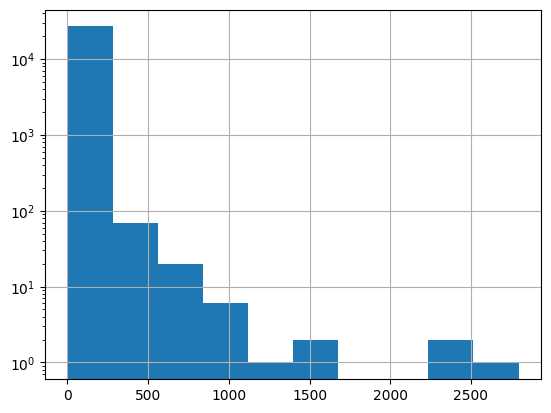

In [83]:
# distribution of recipes by contributor
recipes.contributor_id.value_counts().hist(log=True)

In [84]:
# number of unique contributors
print("Number of unique contributors: ", len(recipes.contributor_id.unique()))

Number of unique contributors:  27021


In [85]:
import re

# number of unique tags
tag_list = [tag_list.split(',') for tag_list in recipes.tags]
tag_list = [item.strip() for sublist in tag_list for item in sublist]
# remove special characters except - and " "
tag_list = [re.sub('[^A-Za-z0-9\s\-"]+', '', tag) for tag in tag_list]
print("Number of unique tags: ", len(set(tag_list)))

Number of unique tags:  512


In [86]:
# Frequency of each tag
from collections import Counter
tag_counts = Counter(tag_list)
pd.DataFrame(tag_counts.most_common(10), columns=['tag', 'count'])

,tag,count
0,preparation,218080
1,time-to-make,217930
2,course,205703
3,main-ingredient,159825
4,dietary,155865
5,easy,119152
6,occasion,107442
7,cuisine,85943
8,low-in-something,80643
9,60-minutes-or-less,69986


<Axes: xlabel='tag'>

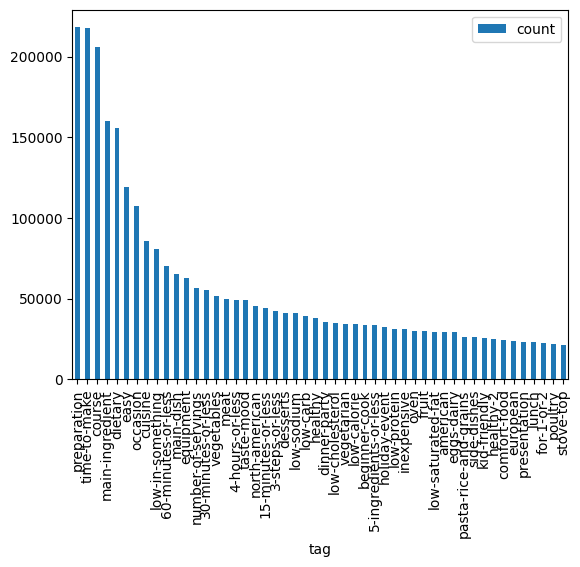

In [87]:
# plot the distribution of tags
pd.DataFrame(tag_counts.most_common(50), columns=['tag', 'count']).plot.bar(x='tag')

In [88]:
import numpy as np

# nutrition = (calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat(PDV), carbohydrates(PDV))
# add new columns for calories, total_fat, sugar, sodium, protein, saturated_fat, carbohydrates 
# nutrition is string = '[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]'
# extract the numbers from the string using numpy
recipes['calories'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[0])
recipes['total_fat'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[1])
recipes['sugar'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[2])
recipes['sodium'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[3])
recipes['protein'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[4])
recipes['saturated_fat'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[5])
recipes['carbohydrates'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[6])

In [89]:
recipes.head(5)

,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [90]:
# drop the nutrition column
recipes.drop('nutrition', axis=1, inplace=True)

In [91]:
# find missing values in the nutrition columns
recipes.isnull().sum()

id                0
minutes           0
contributor_id    0
submitted         0
tags              0
n_steps           0
steps             0
ingredients       0
n_ingredients     0
calories          0
total_fat         0
sugar             0
sodium            0
protein           0
saturated_fat     0
carbohydrates     0
dtype: int64

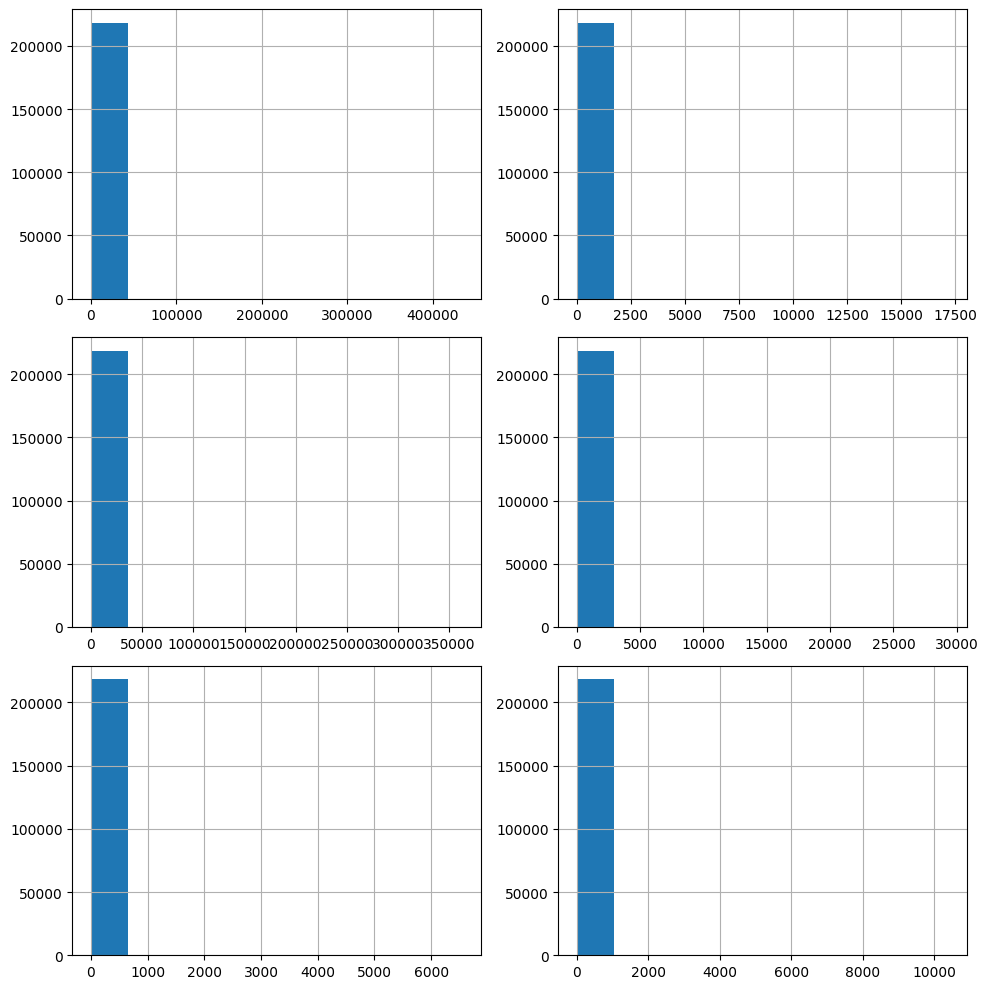

In [92]:
# print the distribution of each nutrition column in a single graph using matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
recipes.calories.hist(ax=axes[0, 0])
recipes.total_fat.hist(ax=axes[0, 1])
recipes.sugar.hist(ax=axes[1, 0])
recipes.sodium.hist(ax=axes[1, 1])
recipes.protein.hist(ax=axes[2, 0])
recipes.saturated_fat.hist(ax=axes[2, 1])

plt.tight_layout()
plt.show()

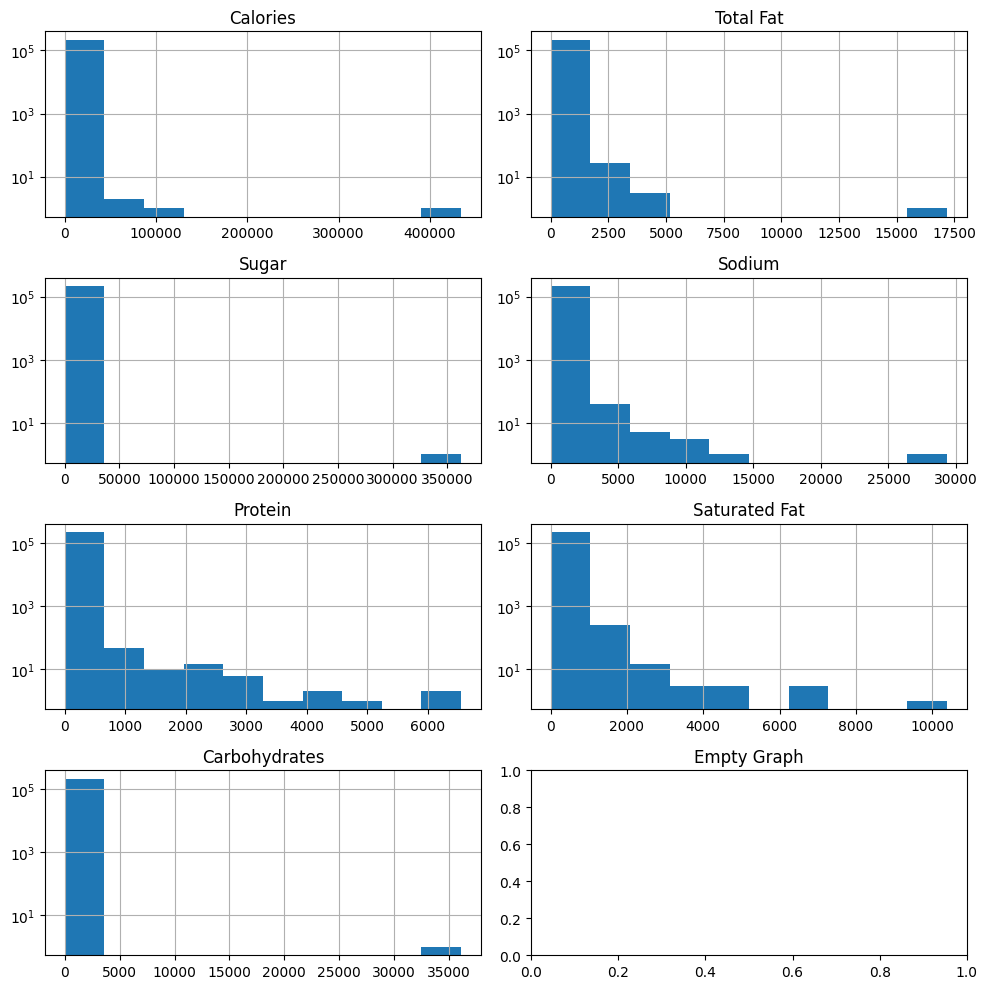

In [93]:
# there are some outliers in the data, remove them
# let's plot a log scale to see the distribution
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
recipes.calories.hist(ax=axes[0, 0], log=True)
axes[0, 0].set_title('Calories')
recipes.total_fat.hist(ax=axes[0, 1], log=True)
axes[0, 1].set_title('Total Fat')
recipes.sugar.hist(ax=axes[1, 0], log=True)
axes[1, 0].set_title('Sugar')
recipes.sodium.hist(ax=axes[1, 1], log=True)
axes[1, 1].set_title('Sodium')
recipes.protein.hist(ax=axes[2, 0], log=True)
axes[2, 0].set_title('Protein')
recipes.saturated_fat.hist(ax=axes[2, 1], log=True)
axes[2, 1].set_title('Saturated Fat')
recipes.carbohydrates.hist(ax=axes[3, 0], log=True)
axes[3, 0].set_title('Carbohydrates')
axes[3, 1].set_title('Empty Graph')
plt.tight_layout()
plt.show()

In [94]:
recipes.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
count,218292.000000,218292.000000,2.182920e+05,218292.000000,218292.000000,218292.000000,218292.000000,218292.000000,218292.000000,218292.000000,218292.00000,218292.000000
mean,222362.845024,45.923002,5.364433e+06,9.711144,9.017248,467.552287,35.676333,83.107068,28.837956,33.476454,45.12623,15.475308
std,141167.718416,38.794019,9.804992e+07,5.856390,3.701491,1199.538077,77.237068,814.978411,122.167983,56.112817,96.38159,83.308991
min,40.000000,0.000000,2.700000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,100311.750000,20.000000,5.704200e+04,6.000000,6.000000,172.200000,8.000000,9.000000,5.000000,6.000000,7.00000,4.000000
50%,207951.000000,35.000000,1.754920e+05,9.000000,9.000000,309.400000,20.000000,24.000000,14.000000,18.000000,22.00000,9.000000
75%,334435.250000,60.000000,4.007080e+05,12.000000,11.000000,513.800000,40.000000,67.000000,32.000000,49.000000,52.00000,16.000000
max,537716.000000,238.000000,2.002290e+09,145.000000,43.000000,434360.200000,17183.000000,362729.000000,29338.000000,6552.000000,10395.00000,36098.000000


In [95]:
# remove values of nutrition columns that are more than 3 standard deviations away from the mean
recipes = recipes[np.abs(recipes.calories - recipes.calories.mean()) <= (3 * recipes.calories.std())]
recipes = recipes[np.abs(recipes.total_fat - recipes.total_fat.mean()) <= (3 * recipes.total_fat.std())]
recipes = recipes[np.abs(recipes.sugar - recipes.sugar.mean()) <= (3 * recipes.sugar.std())]
recipes = recipes[np.abs(recipes.sodium - recipes.sodium.mean()) <= (3 * recipes.sodium.std())]
recipes = recipes[np.abs(recipes.protein - recipes.protein.mean()) <= (3 * recipes.protein.std())]
recipes = recipes[np.abs(recipes.saturated_fat - recipes.saturated_fat.mean()) <= (3 * recipes.saturated_fat.std())]
recipes = recipes[np.abs(recipes.carbohydrates - recipes.carbohydrates.mean()) <= (3 * recipes.carbohydrates.std())]

Text(0.5, 1.0, 'Empty Graph')

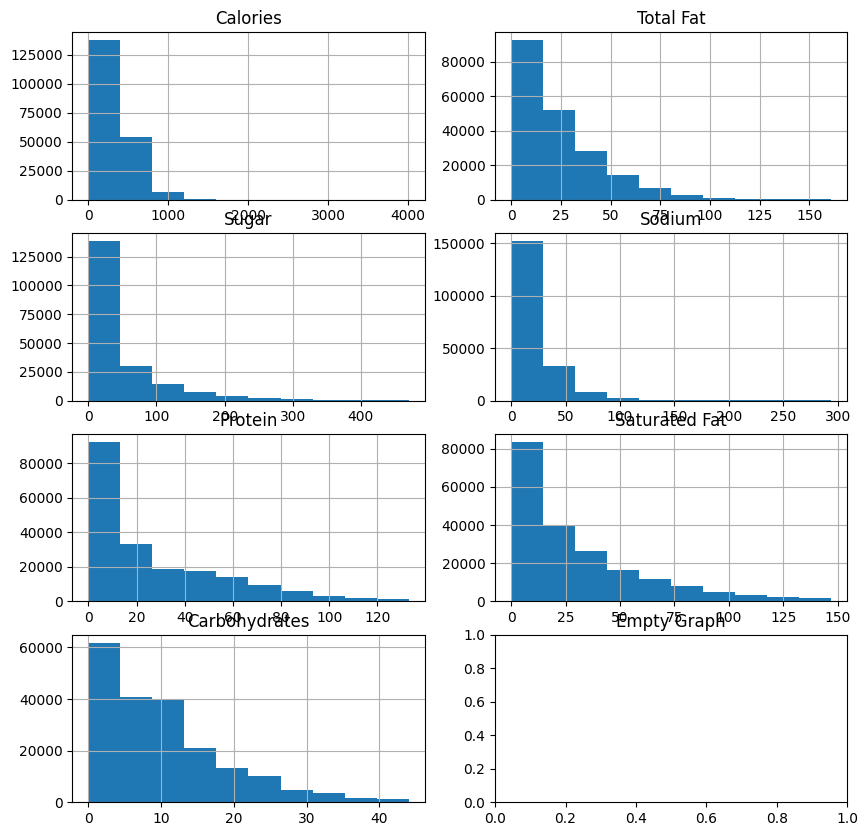

In [96]:
# plot the distribution of each nutrition column in a single graph using matplotlib
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
recipes.calories.hist(ax=axes[0, 0])
axes[0, 0].set_title('Calories')
recipes.total_fat.hist(ax=axes[0, 1])
axes[0, 1].set_title('Total Fat')
recipes.sugar.hist(ax=axes[1, 0])
axes[1, 0].set_title('Sugar')
recipes.sodium.hist(ax=axes[1, 1])
axes[1, 1].set_title('Sodium')
recipes.protein.hist(ax=axes[2, 0])
axes[2, 0].set_title('Protein')
recipes.saturated_fat.hist(ax=axes[2, 1])
axes[2, 1].set_title('Saturated Fat')
recipes.carbohydrates.hist(ax=axes[3, 0])
axes[3, 0].set_title('Carbohydrates')
axes[3, 1].set_title('Empty Graph')

<Axes: >

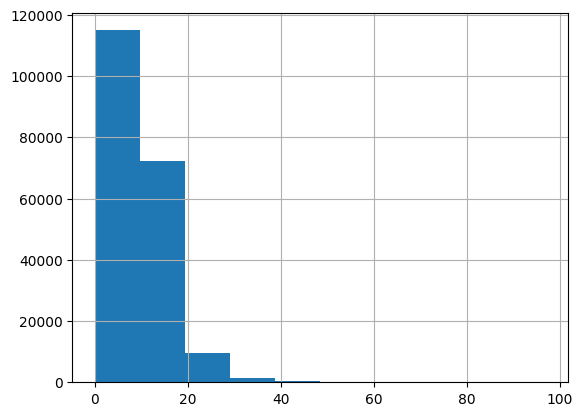

In [97]:
# distribution of n_steps
recipes.n_steps.hist()

<Axes: >

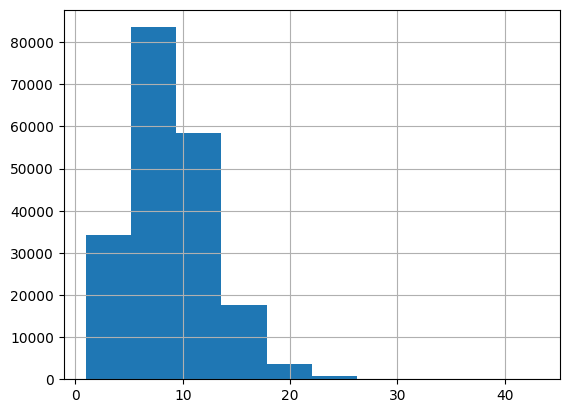

In [98]:
# distribution of n_ingredients
recipes.n_ingredients.hist()

In [99]:
recipes['food_types'] = np.nan
recipes['food_types'] = recipes['food_types'].astype('str')

In [100]:
for i in recipes['ingredients'].index:
    if('eggs' not in recipes['ingredients'][i]):
         if('ice-cream' in recipes['ingredients'][i] or 'chocolate' in recipes['ingredients'][i] or 'cookies' in recipes['ingredients'][i]):
                recipes['food_types'][i]='Veg dessert'
    elif('eggs' in recipes['ingredients'][i]):
        if('ice-cream' in recipes['ingredients'][i] or 'chocolate' in recipes['ingredients'][i] or 'cookies' in recipes['ingredients'][i]):
                recipes['food_types'][i]='Non-Veg dessert'

In [101]:
for i in recipes.index:
    if(recipes['food_types'][i]!='Veg dessert' and recipes['food_types'][i]!='Non-Veg dessert' and 20<recipes['calories'][i]<300):
        recipes['food_types'][i]='Healthy'

In [102]:
for i in recipes.index:
    if(recipes['food_types'][i]!='Veg dessert' and recipes['food_types'][i]!='Non-Veg dessert' and recipes['food_types'][i]!='Healthy'):
        if('chicken' in recipes['ingredients'][i] or 'eggs' in recipes['ingredients'][i] or'ham' in recipes['ingredients'][i] or 'pepperoni' in recipes['ingredients'][i] ):
            recipes['food_types'][i]='Non-veg'

In [104]:
for i in recipes.index:
    if(recipes['food_types'][i]!='Veg dessert' and recipes['food_types'][i]!='Non-Veg dessert' and recipes['food_types'][i]!='Healthy' and recipes['food_types'][i]!='Non-veg'):
        recipes['food_types'][i]='Veg'

In [106]:
recipes['food_types'].value_counts()

Healthy            95728
Veg                53247
Non-veg            37033
Veg dessert         8038
Non-Veg dessert     4203
Name: food_types, dtype: int64

In [107]:
recipes['food_types'].isnull().sum()

0

In [108]:
recipes.head()

,id,minutes,contributor_id,submitted,tags,n_steps,steps,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,food_types
0,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,Healthy
1,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,Healthy
2,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,Healthy
3,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,Veg
4,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,Veg


# RAW Interactions Dataset

In [109]:
# read the interactions dataset
interactions = pd.read_csv('../dataset/RAW_interactions.csv')

In [110]:
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [111]:
# number of rows and columns
interactions.shape

(1132367, 5)

In [112]:
# missing values in the dataset in terms of percentage
interactions.isnull().sum() / interactions.shape[0] * 100

user_id      0.000000
recipe_id    0.000000
date         0.000000
rating       0.000000
review       0.014924
dtype: float64

In [113]:
# replace missing review with empty string
interactions.review = interactions.review.fillna('')

In [114]:
# number of unique users
print("Number of unique users: ", len(interactions.user_id.unique()))

Number of unique users:  226570


In [115]:
# number of unique recipes
print("Number of unique recipes: ", len(interactions.recipe_id.unique()))

Number of unique recipes:  231637


<Axes: >

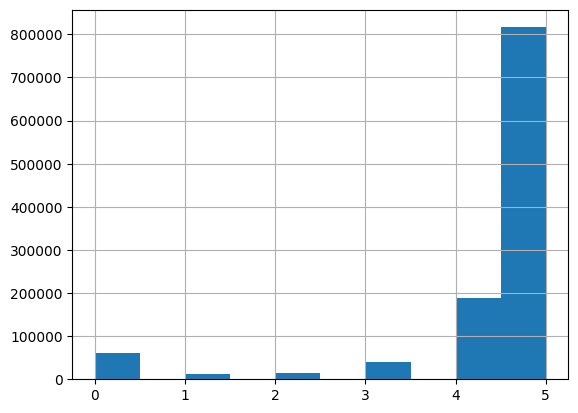

In [116]:
# distribution of ratings
interactions.rating.hist()

In [117]:
# check for unique recipe which are rated but not present in the recipes dataset

# get the list of unique recipe ids from the interactions dataset
unique_recipe_ids = set(interactions.recipe_id.unique())

# get the list of unique recipe ids from the recipes dataset
all_recipe_ids = set(recipes.id.unique())

# find the difference
missing_recipe_ids = unique_recipe_ids - all_recipe_ids
print("Number of missing recipes: ", len(missing_recipe_ids))
print("Number of recipes in the interactions dataset: ", len(unique_recipe_ids))
print("Number of recipes in the recipes dataset: ", len(all_recipe_ids))

Number of missing recipes:  33388
Number of recipes in the interactions dataset:  231637
Number of recipes in the recipes dataset:  198249


In [118]:
# since the recipes dataset is a subset of the interactions dataset, we can remove the missing recipes
interactions = interactions[~interactions.recipe_id.isin(missing_recipe_ids)]

In [119]:
interactions.shape

(962120, 5)

In [120]:
# merge the recipes and interactions dataset using recipe_id from the interactions dataset and id from the recipes dataset
interactions = interactions.merge(recipes, how='left', left_on='recipe_id', right_on='id')

In [121]:
interactions.head()

,user_id,recipe_id,date,rating,review,id,minutes,contributor_id,submitted,tags,...,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,food_types
0,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,44394,20,56824,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...",...,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4,132.3,11.0,39.0,5.0,4.0,11.0,5.0,Healthy
1,76535,134728,2005-09-02,4,Very good!,134728,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
2,273745,134728,2005-12-22,5,Better than the real!!,134728,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
3,353911,134728,2006-09-26,5,Absolutely AWESOME! I was speechless when I tr...,134728,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
4,190375,134728,2007-03-09,5,These taste absolutely wonderful!! My son-in-...,134728,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg


In [122]:
# shape
interactions.shape

(962120, 22)

In [123]:
# missing values in the dataset in terms of percentage
interactions.isnull().sum() / interactions.shape[0] * 100

user_id           0.0
recipe_id         0.0
date              0.0
rating            0.0
review            0.0
id                0.0
minutes           0.0
contributor_id    0.0
submitted         0.0
tags              0.0
n_steps           0.0
steps             0.0
ingredients       0.0
n_ingredients     0.0
calories          0.0
total_fat         0.0
sugar             0.0
sodium            0.0
protein           0.0
saturated_fat     0.0
carbohydrates     0.0
food_types        0.0
dtype: float64

In [124]:
# drop the id column
interactions.drop('id', axis=1, inplace=True)

In [126]:
# save the dataset
interactions.to_csv('../dataset/preprocessed_interactions.csv', index=False)

# Cleaning text attributes

In [127]:
df = pd.read_csv('../dataset/preprocessed_interactions.csv')
df

,user_id,recipe_id,date,rating,review,minutes,contributor_id,submitted,tags,n_steps,...,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,food_types
0,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,20,56824,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...",5,...,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4,132.3,11.0,39.0,5.0,4.0,11.0,5.0,Healthy
1,76535,134728,2005-09-02,4,Very good!,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",10,...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
2,273745,134728,2005-12-22,5,Better than the real!!,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",10,...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
3,353911,134728,2006-09-26,5,Absolutely AWESOME! I was speechless when I tr...,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",10,...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
4,190375,134728,2007-03-09,5,These taste absolutely wonderful!! My son-in-...,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",10,...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962115,102526,54493,2007-04-26,0,I am not going to rate this because I did have...,65,49304,2003-02-21,"['weeknight', 'time-to-make', 'course', 'main-...",10,...,"['chicken', 'garlic', 'dry white wine', 'lemon...",6,338.3,32.0,1.0,7.0,53.0,29.0,2.0,Non-veg
962116,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...,21,742029,2009-08-24,"['30-minutes-or-less', 'time-to-make', 'course...",9,...,"['carrot', 'garbanzo beans', 'salsa', 'corn fl...",8,124.7,1.0,11.0,24.0,10.0,0.0,8.0,Healthy
962117,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...,115,108291,2003-12-05,"['weeknight', 'time-to-make', 'course', 'prepa...",8,...,"['boneless beef chuck roast', 'olive oil', 'ta...",10,828.2,87.0,22.0,20.0,93.0,112.0,4.0,Veg
962118,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...,115,108291,2003-12-05,"['weeknight', 'time-to-make', 'course', 'prepa...",8,...,"['boneless beef chuck roast', 'olive oil', 'ta...",10,828.2,87.0,22.0,20.0,93.0,112.0,4.0,Veg


In [128]:
df
# integer encoding for user_id and recipe_id
df['user_id'] = df['user_id'].astype('category').cat.codes.values
df['recipe_id'] = df['recipe_id'].astype('category').cat.codes.values

In [129]:
df

,user_id,recipe_id,date,rating,review,minutes,contributor_id,submitted,tags,n_steps,...,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,food_types
0,492,20636,2002-12-01,4,This worked very well and is EASY. I used not...,20,56824,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...",5,...,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4,132.3,11.0,39.0,5.0,4.0,11.0,5.0,Healthy
1,8204,64566,2005-09-02,4,Very good!,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",10,...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
2,28657,64566,2005-12-22,5,Better than the real!!,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",10,...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
3,36365,64566,2006-09-26,5,Absolutely AWESOME! I was speechless when I tr...,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",10,...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
4,20197,64566,2007-03-09,5,These taste absolutely wonderful!! My son-in-...,40,166019,2005-08-24,"['60-minutes-or-less', 'time-to-make', 'main-i...",10,...,"['chicken tenders', 'flour', 'garlic powder', ...",12,316.0,4.0,40.0,37.0,78.0,4.0,10.0,Non-veg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962115,10772,25436,2007-04-26,0,I am not going to rate this because I did have...,65,49304,2003-02-21,"['weeknight', 'time-to-make', 'course', 'main-...",10,...,"['chicken', 'garlic', 'dry white wine', 'lemon...",6,338.3,32.0,1.0,7.0,53.0,29.0,2.0,Non-veg
962116,53036,165993,2009-09-29,5,These were so delicious! My husband and I tru...,21,742029,2009-08-24,"['30-minutes-or-less', 'time-to-make', 'course...",9,...,"['carrot', 'garbanzo beans', 'salsa', 'corn fl...",8,124.7,1.0,11.0,24.0,10.0,0.0,8.0,Healthy
962117,16518,36878,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...,115,108291,2003-12-05,"['weeknight', 'time-to-make', 'course', 'prepa...",8,...,"['boneless beef chuck roast', 'olive oil', 'ta...",10,828.2,87.0,22.0,20.0,93.0,112.0,4.0,Veg
962118,5452,36878,2009-01-11,4,Very good! I used regular port as well. The ...,115,108291,2003-12-05,"['weeknight', 'time-to-make', 'course', 'prepa...",8,...,"['boneless beef chuck roast', 'olive oil', 'ta...",10,828.2,87.0,22.0,20.0,93.0,112.0,4.0,Veg


In [130]:
def clean_review(review):
    # convert to string
    review = str(review)
    # expand contractions
    review = contractions.fix(review)
    # convert to lowercase
    review = review.lower()
    # remove trailing and leading spaces
    review = review.strip()
    # replace - with space
    review = re.sub(r'-', ' ', review)
    # remove punctuation
    review = re.sub(r'[^\w\s\\.]', '', review)
    # remove multiple spaces
    review = re.sub(r'\s+', ' ', review)
    return review

clean_review(df['review'][3])

'absolutely awesome i was speechless when i tried them. i have never had such juicy melt in your mouth chicken made at home i would however suggest to reduce the amount of flour. 2 cups was overkill for me.'

In [131]:
df['review'] = df['review'].apply(clean_review)

In [139]:
len(df['review'])

962120

In [132]:
# first 5 reviews
for review in df['review'][:5]:
    print(review + "\n")

this worked very well and is easy. i used not quite a whole package 10oz of white chips. great

very good

better than the real

absolutely awesome i was speechless when i tried them. i have never had such juicy melt in your mouth chicken made at home i would however suggest to reduce the amount of flour. 2 cups was overkill for me.

these taste absolutely wonderful my son in law loves them and requests them often i followed the recipe exactly. thanks so much for posting this recipe.



In [140]:
import nltk
nltk.download('vader_lexicon') # download the necessary lexicon for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

reviews = []
for review in df['review']:
    reviews.append(review)
    
sia = SentimentIntensityAnalyzer()

for review in reviews:
    print(review)
    score = sia.polarity_scores(review)
    print(score)

In [ ]:
for ingredient in df['ingredients'][:5]:
    print(ingredient + "\n")

In [ ]:
# number of unique ingredients
ingredient_list = [ingredient_list.split(',') for ingredient_list in df.ingredients]
ingredient_list = [item.strip() for sublist in ingredient_list for item in sublist]
# remove special characters except - and " "
ingredient_list = [re.sub('[^A-Za-z0-9\s\-"]+', '', ingredient) for ingredient in ingredient_list]
# remove double quotes
ingredient_list = [re.sub('"', '', ingredient) for ingredient in ingredient_list]
print("Number of unique ingredients: ", len(set(ingredient_list)))

In [ ]:
ingredient_list[:10]

In [ ]:
def encode_ingredients(ingredients):
    ingredients = ingredients.split(',')
    ingredients = [ingredient.strip() for ingredient in ingredients]
    ingredients = [re.sub('[^A-Za-z0-9\s\-"]+', '', ingredient) for ingredient in ingredients]
    ingredients = [re.sub('"', '', ingredient) for ingredient in ingredients]
    return ', '.join(ingredients)

encode_ingredients(df['ingredients'][0])

In [ ]:
df['ingredients'] = df['ingredients'].apply(encode_ingredients)

In [ ]:
# number of unique tags
tag_list = [tag_list.split(',') for tag_list in df.tags]
tag_list = [item.strip() for sublist in tag_list for item in sublist]
# remove special characters except - and " "
tag_list = [re.sub('[^A-Za-z0-9\s\-"]+', '', tag) for tag in tag_list]
# remove double quotes
tag_list = [re.sub('"', '', tag) for tag in tag_list]
print("Number of unique tags: ", len(set(tag_list)))

In [ ]:
def encode_tags(tag):
    tag = tag.split(',')
    tag = [tag.strip() for tag in tag]
    tag = [re.sub('[^A-Za-z0-9\s\-"]+', '', tag) for tag in tag]
    tag = [re.sub('"', '', tag) for tag in tag]
    return ', '.join(tag)

encode_tags(df['tags'][0])

In [ ]:
df['tags'] = df['tags'].apply(encode_tags)

In [ ]:
for step in df['steps'][:5]:
    print(step + "\n")

In [ ]:
def clean_steps(steps):
    steps = steps.replace(' ,', ',')
    steps = [step for step in steps.split('\',')]
    steps = [step.strip() for step in steps]
    steps = [re.sub('[^A-Za-z0-9\s\-\,"]+', '', step) for step in steps]
    steps = [re.sub('"', '', step) for step in steps]
    return '\n'.join(steps)

clean_steps(df['steps'][0])

In [ ]:
df['steps'] = df['steps'].apply(clean_steps)

In [ ]:
for step in df['steps'][:5]:
    print(step + "\n")

In [ ]:
# number of unique steps
step_list = [step_list.split('\n') for step_list in df.steps]
step_list = [item.strip() for sublist in step_list for item in sublist]
# replace "'" with ""
step_list = [re.sub("'", '', step) for step in step_list]
print("Number of unique steps: ", len(set(step_list)))

In [ ]:
df.to_csv('../dataset/preprocessed_data.csv', index=False)